# `Data Pre-Processing (Feature Engineering and Feature Selection)`


In [40]:
#importing necessary library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
# Filter out a specific warning category
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import RobustScaler # HAndling Feature Scaling
from sklearn.feature_selection import VarianceThreshold

#Train test split
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Model Training
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#Hypeparameter Tuning
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [41]:
df = pd.read_csv('./data/breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [42]:
list(df)

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'mean_fractal_dimension',
 'radius_error',
 'texture_error',
 'perimeter_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'concavity_error',
 'concave_points_error',
 'symmetry_error',
 'fractal_dimension_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave_points',
 'worst_symmetry',
 'worst_fractal_dimension',
 'target']

In [43]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

#### `Independent and dependent features`

In [44]:
X = df.drop(labels=['target'],axis=1)
y = df[['target']]

#### `Defining columns`

In [45]:
numerical_cols = X.select_dtypes(exclude='object').columns
numerical_cols

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')

In [46]:
numerical_cols = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']

numerical_cols

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'mean_fractal_dimension',
 'radius_error',
 'texture_error',
 'perimeter_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'concavity_error',
 'concave_points_error',
 'symmetry_error',
 'fractal_dimension_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave_points',
 'worst_symmetry',
 'worst_fractal_dimension']

#### `Pipelines`

In [54]:
# Custom Transformer to change numerical values to float16
class Float16Transformer:
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.astype(np.float16)

# Numerical Pipeline
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('float16_transformer', Float16Transformer()),  # Custom transformer to change values to float16
        ('scaler', RobustScaler())
    ]
)

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, numerical_cols)
    ]
)


In [55]:
list(df)

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'mean_fractal_dimension',
 'radius_error',
 'texture_error',
 'perimeter_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'concavity_error',
 'concave_points_error',
 'symmetry_error',
 'fractal_dimension_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave_points',
 'worst_symmetry',
 'worst_fractal_dimension',
 'target']

#### `Train test split`

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [57]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [58]:
X_train.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
100,13.61,24.98,88.05,582.7,0.09488,0.08511,0.086250,0.044890,0.1609,0.05871,...,16.99,35.27,108.60,906.5,0.1265,0.1943,0.31690,0.11840,0.2651,0.07397
398,11.06,14.83,70.31,378.2,0.07741,0.04768,0.027120,0.007246,0.1535,0.06214,...,12.68,20.35,80.79,496.7,0.1120,0.1879,0.20790,0.05556,0.2590,0.09158
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
419,11.16,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.010760,0.1615,0.06144,...,12.36,28.92,79.26,458.0,0.1282,0.1108,0.03582,0.04306,0.2976,0.07123
41,10.95,21.35,71.90,371.1,0.12270,0.12180,0.104400,0.056690,0.1895,0.06870,...,12.84,35.34,87.22,514.0,0.1909,0.2698,0.40230,0.14240,0.2964,0.09606


In [59]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

#  `Model Training`

# `Create an Evaluate Function to give all metrics after model Training`

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    return accuracy, precision, recall, f1


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=False)
}

model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(accuracy_score(y_train, y_train_pred)))
    print("- Precision: {:.4f}".format(precision_score(y_train, y_train_pred)))
    print("- Recall: {:.4f}".format(recall_score(y_train, y_train_pred)))
    print("- F1-Score: {:.4f}".format(f1_score(y_train, y_train_pred)))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy))
    print("- Precision: {:.4f}".format(precision))
    print("- Recall: {:.4f}".format(recall))
    print("- F1-Score: {:.4f}".format(f1))

    print('=' * 35)
    print('\n')

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)


Logistic Regression
Model performance for Training set
- Accuracy: 0.9899
- Precision: 0.9841
- Recall: 1.0000
- F1-Score: 0.9920
----------------------------------
Model performance for Test set
- Accuracy: 0.9942
- Precision: 0.9909
- Recall: 1.0000
- F1-Score: 0.9954


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9240
- Precision: 0.9528
- Recall: 0.9266
- F1-Score: 0.9395


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9591
- Precision: 0.9474
- Recall: 0.9908
- F1-Score: 0.9686


AdaBoost
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-Score: 1.0000
----------------------------------
Model performance for Test set
- Accura

In [62]:
model_f1_scores = pd.DataFrame(list(zip(model_list, f1_list)), columns=['Model Name', 'F1-Score'])
model_f1_scores = model_f1_scores.sort_values(by='F1-Score', ascending=False)

In [63]:
model_f1_scores

,Model Name,F1-Score
0,Logistic Regression,0.995434
5,XGBoost,0.981818
6,CatBoost,0.981818
4,K-Nearest Neighbors,0.972727
2,Random Forest,0.968610
3,AdaBoost,0.968037
1,Decision Tree,0.939535


# `Logistic Regression`

In [64]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy on training set: {:.2%}".format(train_accuracy))
print("Accuracy on test set: {:.2%}".format(test_accuracy))


Accuracy on training set: 98.99%
Accuracy on test set: 99.42%


#  `Plot confusion_matrix`

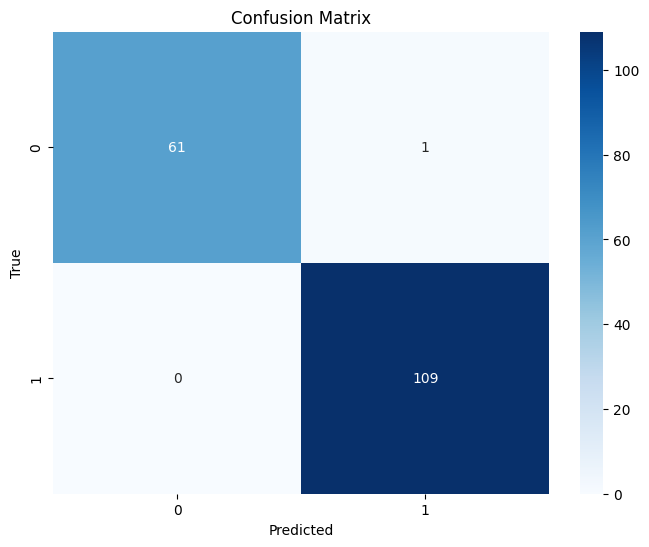

In [65]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# `Hypeparameter Tuning`

In [66]:
# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga']
}

# Create the LogisticRegression object
log_model = LogisticRegression()

# Perform grid search
grid_search = GridSearchCV(log_model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % accuracy)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Accuracy of the model is 98.83
Best hyperparameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


# `Choose best model`

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Define the models to train
models = [
    LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
]

# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__
    print("Training", model_name)

    # Create the pipeline with the preprocessor and the current model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Perform cross-validation and calculate the mean F1-score
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
    mean_score = scores.mean()

    print("Mean F1-score:", mean_score)
    print("-" * 30)


Training LogisticRegression
Mean F1-score: 0.9846129101592919
------------------------------
